# Clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df=sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


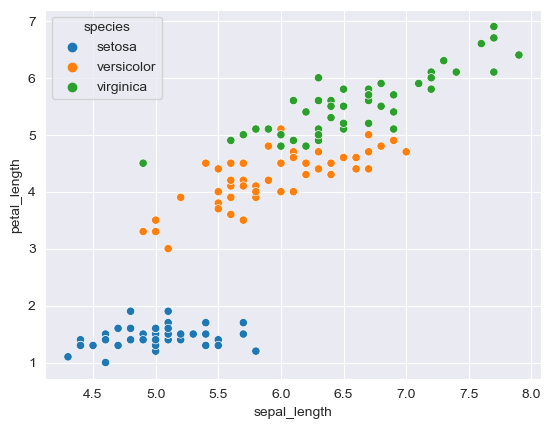

In [3]:
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_length',hue='species');

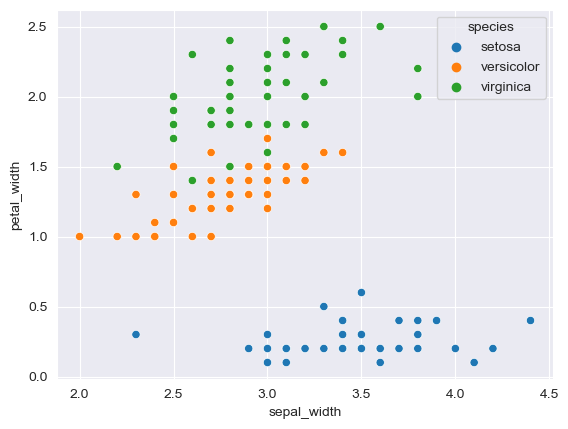

In [4]:
sns.scatterplot(data=iris_df,x='sepal_width',y='petal_width',hue='species');

In [5]:
numeric_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
X=iris_df[numeric_cols]

In [7]:
from sklearn.cluster import KMeans

In [8]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(X)

C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [9]:
preds=model.predict(X)
preds=np.array(preds)

In [10]:
species={
    0:'Versicolor',
    1:'Setosa',
    2:'Virginica'
}

In [11]:
prediction=[]
for i in range(len(preds)):
    prediction.append(species[preds[i]])

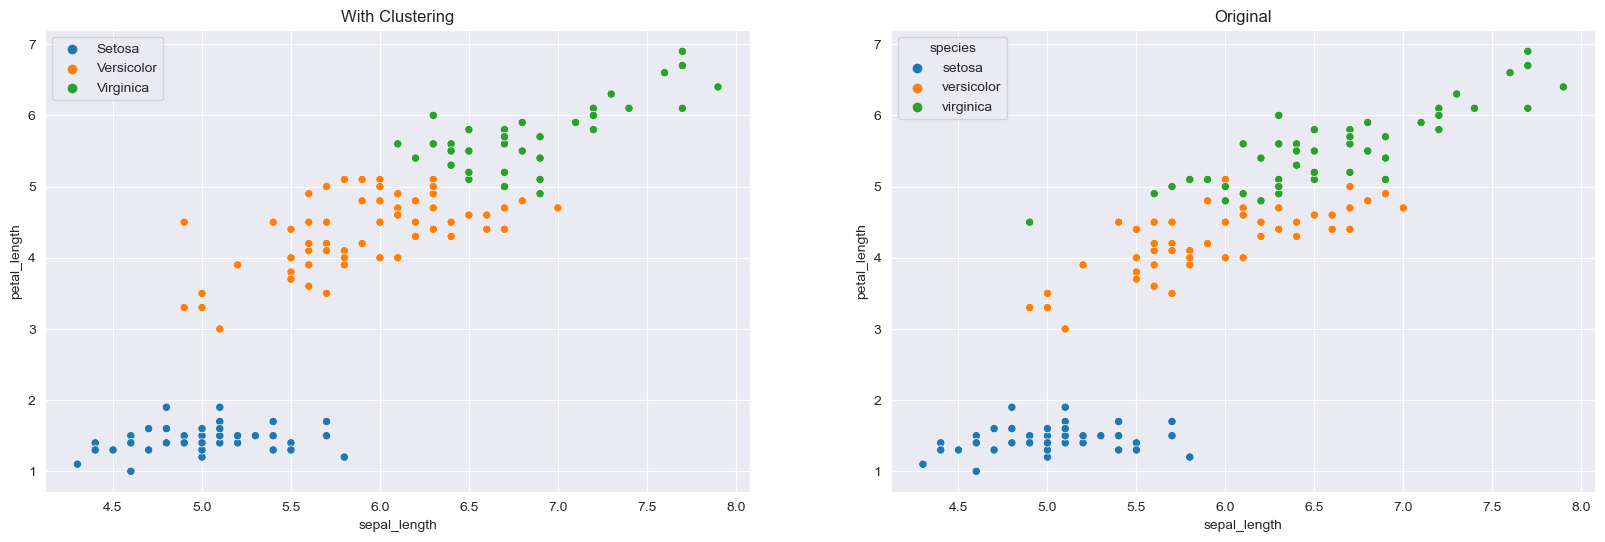

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data=X,x='sepal_length',y='petal_length',hue=prediction,ax=ax[0])
ax[0].set_title('With Clustering')
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_length',hue='species',ax=ax[1])
ax[1].set_title('Original');

In [13]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
model.inertia_

78.85144142614602

In [34]:
inertias=[]
options=range(2,11)
for i in options:
    model=KMeans(n_clusters=i,random_state=42).fit(X)
    inertias.append(model.inertia_)

C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to 

Text(0, 0.5, 'Inertias')

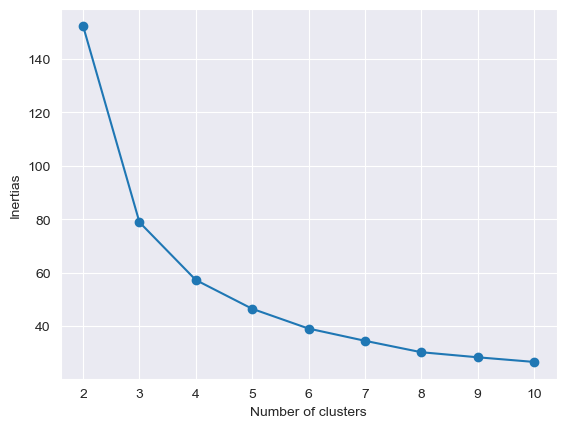

In [37]:
plt.plot(options,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI


In [38]:
from sklearn.cluster import DBSCAN
?DBSCAN

In [67]:
model=DBSCAN(eps=0.4,min_samples=3)
model.fit(X)

DBSCAN(eps=0.4, min_samples=3)

In [68]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  3,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1, -1,  3,
        3,  3,  3, -1, -1, -1, -1, -1,  3,  3,  3,  3, -1,  3,  3, -1, -1,
       -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,  3, -1, -1,  3,  3, -1, -1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
      dtype=int64)

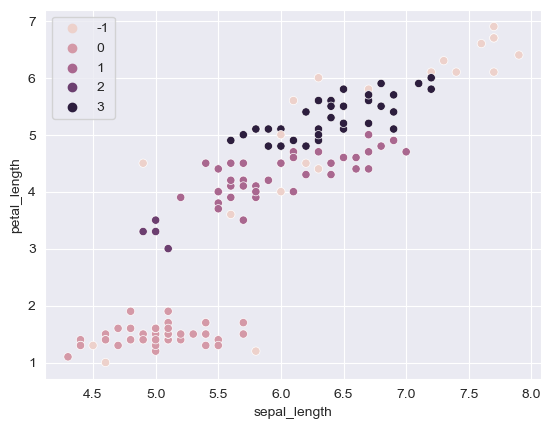

In [69]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);